In [15]:
import pandas as pd
import numpy as np

data = pandas.read_csv("https://raw.githubusercontent.com/rman1061/PCR-data/master/Training%20set%20PCR%20RM.csv")

print(data)

            cq   baseline    plateau  ...  asymmetry     drift  CurveCall
0    39.381426  18.862292  35.527769  ...        5.5  0.036513          1
1    26.649803  23.902034  25.035602  ...        5.5  0.026517          0
2    38.088840  19.150485  37.676668  ...        5.5  0.043123          1
3    38.118073  17.925782  37.875329  ...        5.5 -0.017076          1
4    38.412099  16.631370  30.774217  ...        5.5 -0.002722          1
..         ...        ...        ...  ...        ...       ...        ...
814  20.160053  21.092498  23.350861  ...        5.5  0.072596          0
815  39.303961  22.893166  40.963271  ...        5.5  0.042872          1
816  39.716066  15.535260  39.338963  ...        5.5  0.092601          1
817  39.594327  11.457367  23.660601  ...        5.5  0.080563          1
818  38.447885  18.152409  38.936674  ...        5.5  0.015758          1

[819 rows x 8 columns]


In [17]:
validation = pandas.read_csv("https://raw.githubusercontent.com/rman1061/PCR-data/master/Validation%20set.csv")
print(validation)

           cq   baseline    plateau     slope  inflection  asymmetry     drift
0   38.753616  18.957596  40.446124 -0.409826   34.355259   5.500000  0.073011
1   39.297151  17.001013  34.301219 -0.420699   35.012462   5.500000  0.122409
2   39.368067  20.501493  41.999456 -0.388410   34.727197   5.500000  0.036706
3   39.465475  23.126274  47.378562 -0.453777   35.493119   5.500000  0.092747
4   38.408870  21.554324  46.280721 -0.443321   34.342828   5.500000  0.019278
..        ...        ...        ...       ...         ...        ...       ...
76  24.131033  20.109138  25.211654 -0.074699    0.000000   5.500000  0.042439
77  19.711418  14.005250  35.584570 -0.027315    0.000000   2.646335 -0.076017
78  49.790245  30.119468  32.099307 -2.093398   48.929175   5.500000  0.019863
79  21.649850  18.957812  20.515327 -0.241621   14.189548   5.500000  0.004027
80  39.603332  16.300276  32.381972 -0.429572   35.407151   5.500000  0.083478

[81 rows x 7 columns]


In [18]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.1.2
sklearn: 0.22.2.post1


In [19]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
# shape
print(data.shape)

(819, 8)


In [22]:
# head
print(data.head(20))

           cq   baseline    plateau  ...  asymmetry     drift  CurveCall
0   39.381426  18.862292  35.527769  ...   5.500000  0.036513          1
1   26.649803  23.902034  25.035602  ...   5.500000  0.026517          0
2   38.088840  19.150485  37.676668  ...   5.500000  0.043123          1
3   38.118073  17.925782  37.875329  ...   5.500000 -0.017076          1
4   38.412099  16.631370  30.774217  ...   5.500000 -0.002722          1
5   49.776801  22.076942  23.693891  ...   5.500000  0.077292          0
6   38.333064  16.146603  33.834127  ...   5.500000  0.031736          1
7   40.031302  15.837696  44.779172  ...   5.500000  0.057334          1
8   49.086742  20.537319  37.154088  ...   0.500000  0.043466          0
9   17.055431  14.073752  15.861825  ...   0.500000  0.052773          0
10  37.908406  22.370265  50.692633  ...   5.500000  0.045774          1
11  11.536445  21.677045  22.731130  ...   1.756592  0.056162          0
12  38.991561  25.051722  45.198211  ...   5.500000

In [24]:
# descriptions
print(data.describe())

               cq    baseline     plateau  ...   asymmetry       drift   CurveCall
count  819.000000  819.000000  819.000000  ...  819.000000  819.000000  819.000000
mean    37.143438   18.682355   33.326692  ...    4.665233    0.043027    0.562882
std      9.895221    3.416663    9.965060  ...    1.651566    0.041688    0.496333
min      0.509646    9.694156   11.268420  ...    0.500000   -0.277589    0.000000
25%     37.841447   16.328812   25.338880  ...    5.500000    0.022779    0.000000
50%     38.721260   18.574490   34.717038  ...    5.500000    0.038355    1.000000
75%     40.812796   21.128774   40.026132  ...    5.500000    0.062826    1.000000
max     49.982774   29.108979   87.612062  ...    5.500000    0.244130    1.000000

[8 rows x 8 columns]


In [39]:
y = data.CurveCall

In [40]:
data_features = ['cq', 'baseline', 'plateau', 'slope', 'inflection', 'asymmetry',
       'drift']

In [41]:
X = data[data_features]
X.describe()
X.head()


,cq,baseline,plateau,slope,inflection,asymmetry,drift
0,39.381426,18.862292,35.527769,-0.447984,35.357707,5.5,0.036513
1,26.649803,23.902034,25.035602,-0.138960,13.677998,5.5,0.026517
2,38.088840,19.150485,37.676668,-0.429194,33.888961,5.5,0.043123
3,38.118073,17.925782,37.875329,-0.412705,33.750390,5.5,-0.017076
4,38.412099,16.631370,30.774217,-0.442670,34.340077,5.5,-0.002722


In [127]:
X.describe()


,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,37.143438,18.682355,33.326692,-0.462745,33.695428,4.665233,0.043027
std,9.895221,3.416663,9.965060,0.316922,11.781201,1.651566,0.041688
min,0.509646,9.694156,11.268420,-4.564430,0.000000,0.500000,-0.277589
25%,37.841447,16.328812,25.338880,-0.466509,33.774451,5.500000,0.022779
50%,38.721260,18.574490,34.717038,-0.430051,34.591830,5.500000,0.038355
75%,40.812796,21.128774,40.026132,-0.393576,39.486929,5.500000,0.062826
max,49.982774,29.108979,87.612062,-0.010000,60.000000,5.500000,0.244130


In [42]:
valid_X = validation[data_features]
valid_X.describe()
valid_X.head()

,cq,baseline,plateau,slope,inflection,asymmetry,drift
0,38.753616,18.957596,40.446124,-0.409826,34.355259,5.5,0.073011
1,39.297151,17.001013,34.301219,-0.420699,35.012462,5.5,0.122409
2,39.368067,20.501493,41.999456,-0.388410,34.727197,5.5,0.036706
3,39.465475,23.126274,47.378562,-0.453777,35.493119,5.5,0.092747
4,38.408870,21.554324,46.280721,-0.443321,34.342828,5.5,0.019278


In [102]:
X.columns 

Index(['cq', 'baseline', 'plateau', 'slope', 'inflection', 'asymmetry',
       'drift'],
      dtype='object')

In [129]:
#checking for any missing values
X.columns[X.isnull().any()]

Index([], dtype='object')

In [104]:
#checking for any missing values
validation.columns[validation.isnull().any()]

Index([], dtype='object')

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

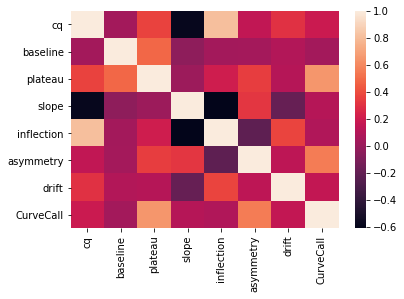

In [36]:
sns.heatmap(data.corr());


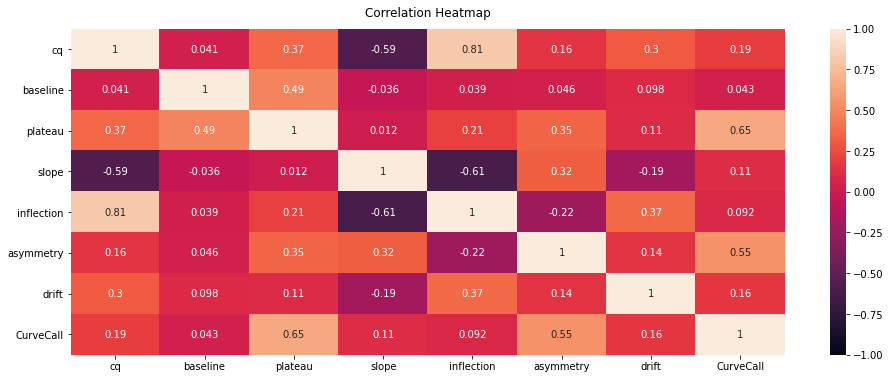

In [37]:
# Increasing the size of the heatmap.
plt.figure(figsize=(16, 6))
# Storing the heatmap object in a variable to easily access it when I include more features.
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#In conclusion, the strongest features were plateau, asymmetry, cq in generating the True or False Signal. 

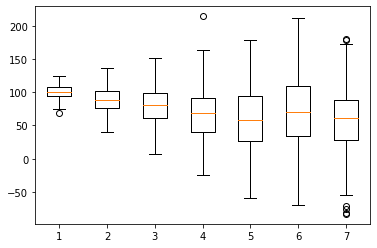

In [51]:
# Creating dataset 
np.random.seed(10) 
cq = np.random.normal(100, 10, 200) 
baseline = np.random.normal(90, 20, 200) 
plateau = np.random.normal(80, 30, 200) 
slope = np.random.normal(70, 40, 200) 
inflection= np.random.normal(60,50,200)
asymmetry= np.random.normal(70,50,200)
drift= np.random.normal(60,50,200)


import matplotlib.pyplot as plot

import numpy as np

 

#Generate the data
cq = np.random.normal(100, 10, 200) 
baseline = np.random.normal(90, 20, 200) 
plateau = np.random.normal(80, 30, 200) 
slope = np.random.normal(70, 40, 200) 
inflection= np.random.normal(60,50,200)
asymmetry= np.random.normal(70,50,200)
drift= np.random.normal(60,50,200)

 

plot.boxplot((cq, baseline, plateau, slope, inflection, asymmetry, drift))

plot.show()

#This allows me to get a full understanding of the dataset, to understand the individual features one by one. Understanding the outliers in each set in the case of drift, slope
#allows me to track if there is any variation in the medium. 

In [131]:
from statistics import median 
  
# Importing fractions module as fr 
from fractions import Fraction as fr 
  
# Printing the median of above datsets 
print("Median of cq is % s" % (median(cq))) 
print("Median of baseline is % s" % (median(baseline))) 
print("Median of plateau is % s" % (median(plateau))) 
print("Median of slope is % s" % (median(slope))) 
print("Median of inflection is % s" % (median(inflection))) 
print("Median of asymmetry is % s" % (median(asymmetry))) 
print("Median of drift is % s" % (median(drift))) 

Median of cq is 100.34380616693612
Median of baseline is 87.7669282383655
Median of plateau is 80.26442882476849
Median of slope is 68.26950981199644
Median of inflection is 57.49488757968079
Median of asymmetry is 70.82857973284638
Median of drift is 61.615881037476846


In [122]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

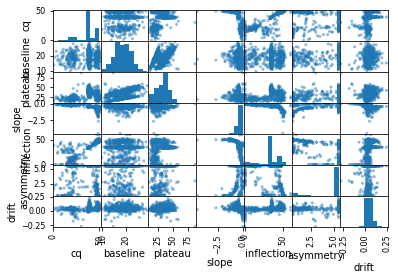

In [123]:
scatter_matrix(X)
pyplot.show()

In [80]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
#Splitting the training and testing set, 80% training, 20% testing. 

In [81]:
# Building and evaluating the models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model to see which would be a good fit. 
#So there are now 6 models and we can note the accuracy estimations with each model. We can compare the models to select the most accurate. 
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.957273 (0.011299)
LDA: 0.925291 (0.032110)
KNN: 0.986247 (0.008268)
CART: 0.983217 (0.014431)
NB: 0.989324 (0.011921)
SVM: 0.983147 (0.016025)


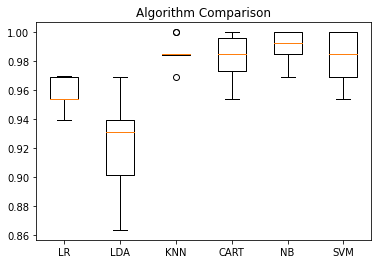

In [82]:
# Compare Algorithms
#Comparing the samples of results for each algorithm by studying the box and whisker plot distributions.
#Gaussian Naive Bayes model has an accuracy of 98.9%, it is the most accurate. 
import matplotlib.pyplot as plt

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [85]:
#We can fit the model on the entire training dataset and make predictions on the validation dataset.Confirming the accuracy of the model on validation set..
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

In [130]:
# Evaluate predictions by comparing them to the expected results in the validation set, 
#Then calculating the classification accuracy, confusion matrix and then classification report.
#Naive Bayes had an .987 or about 98.7% on the hold out dataset.
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9878048780487805
[[70  0]
 [ 2 92]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.98      0.99        94

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164

